# **[Modul 2] *Spin Coating* dan Karaterisasi Sel Surya**

Anggota kelompok:

1. Muhammad Afief Abdurrahman (10221006)
2. Auza Naufal Abraar (10221016)
3. Muhamad Daffa Fawwaz F. J. (10221040)


## ***Style Setup***

In [1002]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [1003]:
from matplotlib.font_manager import fontManager, FontProperties

path = "/content/fonts/Inter-Medium.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)

In [1004]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font=prop.get_name(), palette="Set2")
sns.set_context("paper", rc={"lines.linewidth": 1.5})

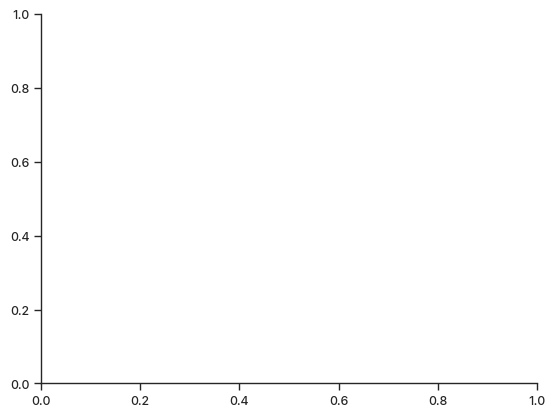

In [1005]:
fig, ax = plt.subplots()
mid = (fig.subplotpars.right + fig.subplotpars.left)/2

# **Percobaan 1 - *Spin Coating***
---

## ***Visualization Setup***

### **Definisi Konstanta / Variasi**

In [1006]:
vol = 1e-4 # litre
t = 20 # sekon
rpm = [500, 1000, 2000, 3000, 4000] # RPM

### **Data Frames**

#### **Data P3HT**

In [1007]:
# Ketebalan (meter)
p3ht = {"Kecepatan sudut putar": rpm, "Ketebalan": [200, 100, 50, 34, 25]}
df_p3ht = pd.DataFrame(data=p3ht)

# Ganti nanometer ke meter
df_p3ht['Ketebalan'] = df_p3ht['Ketebalan'].apply(lambda x: x/(1e+9))

df_p3ht.head()

,Kecepatan sudut putar,Ketebalan
0,500,2.000000e-07
1,1000,1.000000e-07
2,2000,5.000000e-08
3,3000,3.400000e-08
4,4000,2.500000e-08


In [1008]:
# Define constants
h_0_p3ht = max(df_p3ht['Ketebalan'])
x_p3ht = df_p3ht["Kecepatan sudut putar"]
y_p3ht = df_p3ht['Ketebalan']
x_fit_p3ht = np.linspace(min(df_p3ht["Kecepatan sudut putar"])/2, 3 * max(df_p3ht["Kecepatan sudut putar"])/2, 1000)

#### **Data R-Dye**

In [1009]:
# Ketebalan (meter)
r_dye = {'RPM': rpm, "Ketebalan": [65, 35, 15, 10, 8]}
df_r_dye = pd.DataFrame(data=r_dye)

# Ganti nanometer ke meter
df_r_dye['Ketebalan'] = df_r_dye['Ketebalan'].apply(lambda x: x/(1e+9))

df_r_dye.head()

,RPM,Ketebalan
0,500,6.500000e-08
1,1000,3.500000e-08
2,2000,1.500000e-08
3,3000,1.000000e-08
4,4000,8.000000e-09


In [1010]:
# Define constants
h_0_r_dye = df_r_dye['Ketebalan'].iloc[0]
x_r_dye = df_r_dye['RPM']
y_r_dye = df_r_dye['Ketebalan']
x_fit_r_dye = np.linspace(df_r_dye['RPM'].iloc[0], df_r_dye['RPM'].iloc[-1], 1000)

#### **Data MEH-PPV**

In [1011]:
# Ketebalan (meter)
meh_ppv = {'RPM': rpm, "Ketebalan": [50, 20, 10, 5, 2]}
df_meh_ppv = pd.DataFrame(data=meh_ppv)

# Ganti nanometer ke meter
df_meh_ppv['Ketebalan'] = df_meh_ppv['Ketebalan'].apply(lambda x: x/(1e+9))

df_meh_ppv.head()

,RPM,Ketebalan
0,500,5.000000e-08
1,1000,2.000000e-08
2,2000,1.000000e-08
3,3000,5.000000e-09
4,4000,2.000000e-09


In [1012]:
# Define constants
h_0_meh_ppv = df_meh_ppv['Ketebalan'].iloc[0] # meter
x_meh_ppv = df_meh_ppv['RPM']
y_meh_ppv = df_meh_ppv['Ketebalan']
x_fit_meh_ppv = np.linspace(df_meh_ppv['RPM'].iloc[0], df_meh_ppv['RPM'].iloc[-1], 1000)

### **Model Definition**

In [1013]:
def f_ebp(x, a, b):
  return 1/np.sqrt(a + b * (x ** 2)) # a = 1/(h_0^2), b =

def f_meyerhofer(x, k):
  return 1/np.cbrt(k * (x ** 2)) # k = (3 * eta_0 * E)/(2 * rho)

def f_empirik(x, k):
  return k * (x ** (-1/2))

## **I. P3HT**

### **Fitting Model EBP**

In [1014]:
param_ebp_p3ht, param_cov_ebp_p3ht = curve_fit(f_ebp, x_p3ht, y_p3ht)

print(f"Koefisien: {param_ebp_p3ht}, Kovarian koefisien: {param_cov_ebp_p3ht}")

Koefisien: [1.19982013e+11 9.95405095e+07], Kovarian koefisien: [[ 4.64464831e+22 -1.45910111e+17]
 [-1.45910111e+17  5.55172607e+11]]


In [1015]:
ans_ebp_p3ht = f_ebp(x_fit_p3ht, param_ebp_p3ht[0], param_ebp_p3ht[1])

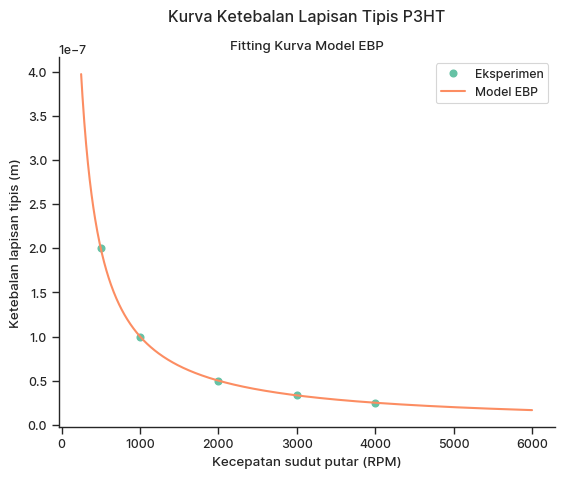

In [1016]:
plt.plot(x_p3ht, y_p3ht, 'o', label='Eksperimen')
plt.plot(x_fit_p3ht, ans_ebp_p3ht, label='Model EBP')

plt.legend()

plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan lapisan tipis (m)")

plt.suptitle("Kurva Ketebalan Lapisan Tipis P3HT", fontweight="black", x=mid)

plt.title("Fitting Kurva Model EBP")

plt.show()

### **Fitting Model Meyerhofer**

In [1017]:
param_meyerhofer_p3ht, param_cov_meyerhofer_p3ht = curve_fit(f_meyerhofer, x_p3ht, y_p3ht)

print(f"Koefisien: {param_meyerhofer_p3ht}, Kovarian koefisien: {param_cov_meyerhofer_p3ht}")

Koefisien: [7.4346153e+14], Kovarian koefisien: [[4.31577155e+28]]


In [1018]:
ans_meyerhofer_p3ht = f_meyerhofer(x_fit_p3ht, param_meyerhofer_p3ht[0])

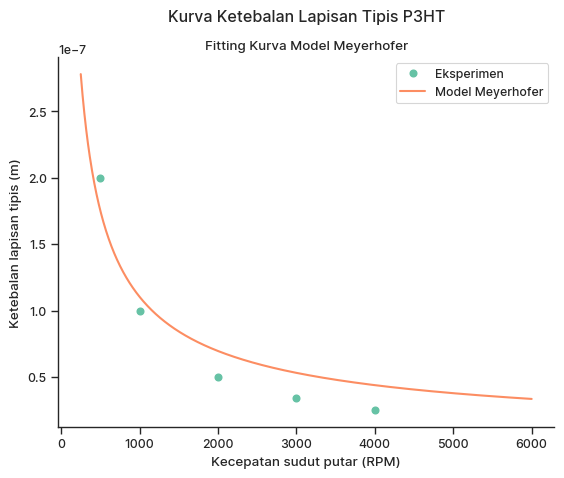

In [1019]:
plt.plot(x_p3ht, y_p3ht, 'o', label='Eksperimen')
plt.plot(x_fit_p3ht, ans_meyerhofer_p3ht, label='Model Meyerhofer')
plt.legend()
plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan lapisan tipis (m)")
plt.suptitle("Kurva Ketebalan Lapisan Tipis P3HT", fontweight="black", x=mid)
plt.title("Fitting Kurva Model Meyerhofer")
plt.show()

### **Fitting Model Empirik**

In [1020]:
param_empirik_p3ht, param_cov_empirik_p3ht = curve_fit(f_empirik, x_p3ht, y_p3ht)

print(f"Koefisien: {param_empirik_p3ht}, Kovarian koefisien: {param_cov_empirik_p3ht}")

Koefisien: [3.4874989e-06], Kovarian koefisien: [[2.82664391e-13]]


In [1021]:
ans_empirik_p3ht = f_empirik(x_fit_p3ht, param_empirik_p3ht[0])

Text(0.5, 1.0, 'Fitting Kurva Model Empirik')

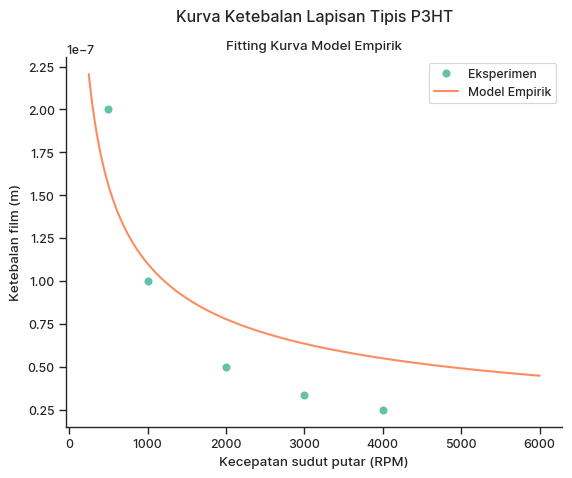

In [1022]:
plt.plot(x_p3ht, y_p3ht, 'o', label='Eksperimen')
plt.plot(x_fit_p3ht, ans_empirik_p3ht, label='Model Empirik')
plt.legend()
plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan film (m)")
plt.suptitle("Kurva Ketebalan Lapisan Tipis P3HT", fontweight="black", x=mid)
plt.title("Fitting Kurva Model Empirik")

### **Perbandingan Fitting**

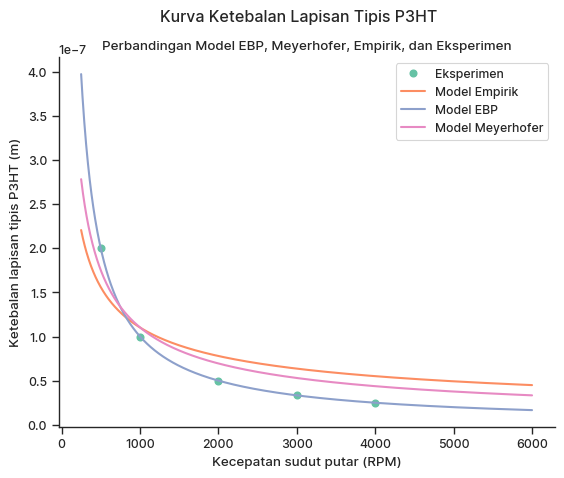

In [1023]:
plt.plot(x_p3ht, y_p3ht, 'o', label="Eksperimen")
plt.plot(x_fit_p3ht, ans_empirik_p3ht, label="Model Empirik")
plt.plot(x_fit_p3ht, ans_ebp_p3ht, label="Model EBP")
plt.plot(x_fit_p3ht, ans_meyerhofer_p3ht, label="Model Meyerhofer")

plt.suptitle("Kurva Ketebalan Lapisan Tipis P3HT", fontweight="black")
plt.title("Perbandingan Model EBP, Meyerhofer, Empirik, dan Eksperimen")

plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan lapisan tipis P3HT (m)")

plt.legend()

plt.show()

## **II. R-Dye**

### **Fitting Model EBP**

In [1024]:
param_ebp_r_dye, param_cov_ebp_r_dye = curve_fit(f_ebp, x_r_dye, y_r_dye)

print(f"Koefisien: {param_ebp_r_dye}, Kovarian koefisien: {param_cov_ebp_r_dye}")

Koefisien: [1.25777596e+13 8.90804366e+08], Kovarian koefisien: [[ 6.68760594e+26 -2.04715799e+21]
 [-2.04715799e+21  7.74410373e+15]]


In [1025]:
ans_ebp_r_dye = f_ebp(x_fit_r_dye, param_ebp_r_dye[0], param_ebp_r_dye[1])

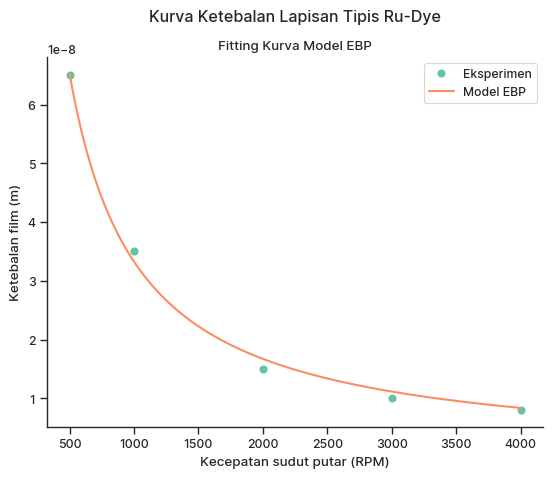

In [1026]:
plt.plot(x_r_dye, y_r_dye, 'o', label='Eksperimen')
plt.plot(x_fit_r_dye, ans_ebp_r_dye, label='Model EBP')
plt.legend()
plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan film (m)")

plt.suptitle("Kurva Ketebalan Lapisan Tipis Ru-Dye", weight="black", x=mid)

plt.title("Fitting Kurva Model EBP")
plt.show()

### **Fitting Model Meyerhofer**

In [1027]:
param_meyerhofer_r_dye, param_cov_meyerhofer_r_dye = curve_fit(f_meyerhofer, x_r_dye, y_r_dye)

print(f"Koefisien: {param_meyerhofer_r_dye}, Kovarian koefisien: {param_cov_meyerhofer_r_dye}")

Koefisien: [2.11775337e+16], Kovarian koefisien: [[3.8475953e+31]]


In [1028]:
ans_meyerhofer_r_dye = f_meyerhofer(x_fit_r_dye, param_meyerhofer_r_dye[0])

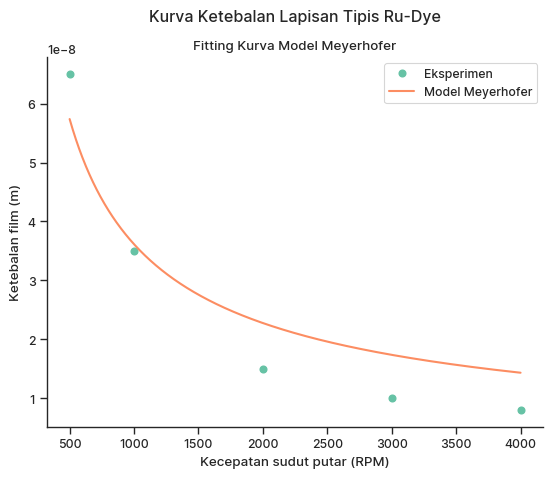

In [1029]:
plt.plot(x_r_dye, y_r_dye, 'o', label='Eksperimen')
plt.plot(x_fit_r_dye, ans_meyerhofer_r_dye, label='Model Meyerhofer')
plt.legend()
plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan film (m)")
plt.suptitle("Kurva Ketebalan Lapisan Tipis Ru-Dye", weight="black", x=mid)
plt.title("Fitting Kurva Model Meyerhofer")
plt.show()

### **Fitting Model Empirik**

In [1030]:
param_empirik_r_dye, param_cov_empirik_r_dye = curve_fit(f_empirik, x_r_dye, y_r_dye)

print(f"Koefisien: {param_empirik_r_dye}, Kovarian koefisien: {param_cov_empirik_r_dye}")

Koefisien: [1.14077413e-06], Kovarian koefisien: [[3.21483909e-14]]


In [1031]:
ans_empirik_r_dye = f_empirik(x_fit_r_dye, param_empirik_r_dye[0])

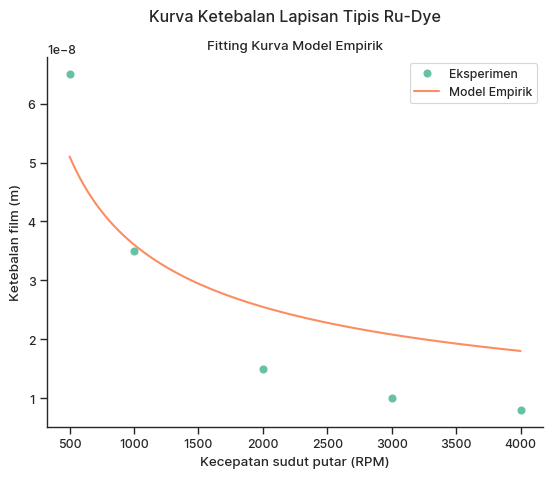

In [1032]:
plt.plot(x_r_dye, y_r_dye, 'o', label='Eksperimen')
plt.plot(x_fit_r_dye, ans_empirik_r_dye, label='Model Empirik')
plt.legend()
plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan film (m)")
plt.suptitle("Kurva Ketebalan Lapisan Tipis Ru-Dye", weight="black", x=mid)
plt.title("Fitting Kurva Model Empirik")
plt.show()

### **Perbandingan Fitting**

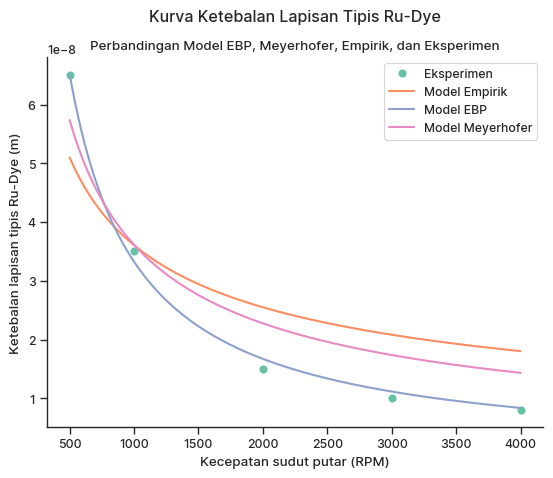

In [1033]:
plt.plot(x_r_dye, y_r_dye, 'o', label="Eksperimen")
plt.plot(x_fit_r_dye, ans_empirik_r_dye, label="Model Empirik")
plt.plot(x_fit_r_dye, ans_ebp_r_dye, label="Model EBP")
plt.plot(x_fit_r_dye, ans_meyerhofer_r_dye, label="Model Meyerhofer")

plt.suptitle("Kurva Ketebalan Lapisan Tipis Ru-Dye", weight="black", x=mid)
plt.title("Perbandingan Model EBP, Meyerhofer, Empirik, dan Eksperimen")

plt.xlabel("Kecepatan sudut putar (RPM)")
plt.ylabel("Ketebalan lapisan tipis Ru-Dye (m)")

plt.legend()

plt.show()

# **Percobaan 2 - Karakterisasi Sel Surya**
---

## **Keadaan Gelap**

### **I. Gelap DSSC**

In [1034]:
df_gelap_dssc = pd.read_csv('/content/dataset/karakterisasi/Gelap_DSSC', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_gelap_dssc.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.198910,0.000046
2,-0.188817,0.000040
3,-0.178674,0.000034
4,-0.168998,0.000030


In [1035]:
# Menghilangkan nilai 0,0
df_gelap_dssc.drop(df_gelap_dssc.loc[(df_gelap_dssc['Tegangan'] == 0) & (df_gelap_dssc['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_gelap_dssc.drop(df_gelap_dssc.loc[df_gelap_dssc['Tegangan'] < 0].index, inplace=True)

In [1036]:
df_gelap_dssc.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450890,-0.000412
std,0.264085,0.000737
min,0.000998,-0.002747
25%,0.226229,-0.000448
50%,0.451227,-0.000022
75%,0.675791,0.000009
max,0.900922,0.000020


In [1037]:
print(f"Duplicated: {df_gelap_dssc.duplicated().sum()}\n\nNull columns:\n{df_gelap_dssc.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


Daya maksimum (Gelap DSSC)

In [1038]:
df_gelap_dssc["Densitas Arus"] = df_gelap_dssc["Arus"].apply(lambda x: x/0.000009)

In [1039]:
# Daya Maksimum
df_gelap_dssc['Area'] = df_gelap_dssc['Tegangan'] * df_gelap_dssc['Densitas Arus']

df_gelap_dssc[df_gelap_dssc["Area"] == max(df_gelap_dssc["Area"])]

,Tegangan,Arus,Densitas Arus,Area
40,0.191112,0.000015,1.670387,0.319231


$V_{OC}$ Gelap DSSC

In [1040]:
# V_OC
df_gelap_dssc["Abs Arus"] = df_gelap_dssc["Densitas Arus"].apply(np.absolute)

df_gelap_dssc[df_gelap_dssc["Abs Arus"] == min(df_gelap_dssc["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
52,0.310993,3.400000e-07,0.037778,0.011749,0.037778


$I_{SC}$ Gelap DSSC

In [1041]:
# I_SC
df_gelap_dssc["Abs Tegangan"] = df_gelap_dssc["Tegangan"].apply(np.absolute)

df_gelap_dssc[df_gelap_dssc["Abs Tegangan"] == min(df_gelap_dssc["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.000998,0.000019,2.125999,0.002121,2.125999,0.000998


In [1042]:
df_gelap_dssc.describe()

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.450890,-0.000412,-45.815478,-37.124988,46.772884,0.450890
std,0.264085,0.000737,81.906532,69.812110,81.357546,0.264085
min,0.000998,-0.002747,-305.222243,-274.981534,0.037778,0.000998
25%,0.226229,-0.000448,-49.728337,-33.621433,1.537501,0.226229
50%,0.451227,-0.000022,-2.430120,-1.096535,2.430120,0.451227
75%,0.675791,0.000009,0.967986,0.098590,49.728337,0.675791
max,0.900922,0.000020,2.220918,0.319231,305.222243,0.900922


[Text(0.5, 1.0, 'Karakterisasi I-V Gelap DSSC'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

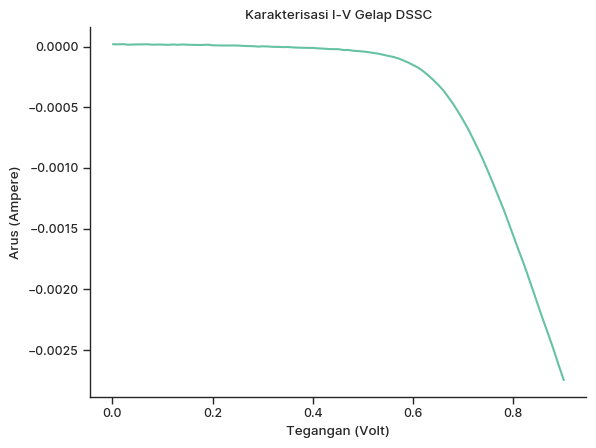

In [1043]:
fig = sns.lineplot(df_gelap_dssc, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Gelap DSSC", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

### **II. Gelap DSSC dengan AgSC8 14.89 wt**

In [1044]:
df_gelap_dssc_agsc = pd.read_csv('/content/dataset/karakterisasi/Gelap_DSSC_AgSC', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_gelap_dssc_agsc.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.199310,0.000096
2,-0.188684,0.000079
3,-0.178691,0.000069
4,-0.168898,0.000062


In [1045]:
# Menghilangkan nilai 0,0
df_gelap_dssc_agsc.drop(df_gelap_dssc_agsc.loc[(df_gelap_dssc_agsc['Tegangan'] == 0) & (df_gelap_dssc_agsc['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_gelap_dssc_agsc.drop(df_gelap_dssc_agsc.loc[df_gelap_dssc_agsc['Tegangan'] < 0].index, inplace=True)

In [1046]:
df_gelap_dssc_agsc.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450789,-0.000593
std,0.264111,0.000917
min,0.000748,-0.003436
25%,0.225779,-0.000729
50%,0.450910,-0.000138
75%,0.675800,-0.000018
max,0.900689,0.000019


In [1047]:
print(f"Duplicated: {df_gelap_dssc_agsc.duplicated().sum()}\n\nNull columns:\n{df_gelap_dssc_agsc.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


In [1048]:
df_gelap_dssc_agsc["Densitas Arus"] = df_gelap_dssc_agsc["Arus"].apply(lambda x: x/0.000009)

In [1049]:
# Daya Maksimum
df_gelap_dssc_agsc['Area'] = df_gelap_dssc_agsc['Tegangan'] * df_gelap_dssc_agsc['Densitas Arus']

df_gelap_dssc_agsc[df_gelap_dssc_agsc["Area"] == max(df_gelap_dssc_agsc["Area"])]

,Tegangan,Arus,Densitas Arus,Area
30,0.09085,0.000013,1.423598,0.129334


In [1050]:
# V_OC
df_gelap_dssc_agsc["Abs Arus"] = df_gelap_dssc_agsc["Densitas Arus"].apply(np.absolute)

df_gelap_dssc_agsc[df_gelap_dssc_agsc["Abs Arus"] == min(df_gelap_dssc_agsc["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
36,0.150591,0.000002,0.170665,0.025701,0.170665


In [1051]:
# I_SC
df_gelap_dssc_agsc["Abs Tegangan"] = df_gelap_dssc_agsc["Tegangan"].apply(np.absolute)

df_gelap_dssc_agsc[df_gelap_dssc_agsc["Abs Tegangan"] == min(df_gelap_dssc_agsc["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.000748,0.000018,1.955145,0.001462,1.955145,0.000748


[Text(0.5, 1.0, 'Karakterisasi I-V Gelap DSSC + AgSC8 14.89 wt'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

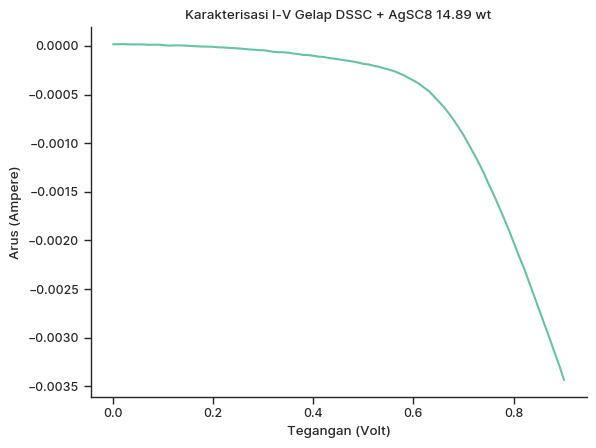

In [1052]:
fig = sns.lineplot(df_gelap_dssc_agsc, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Gelap DSSC + AgSC8 14.89 wt", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

### **III. Gelap Konvensional**

In [1053]:
df_gelap_konvensional = pd.read_csv('/content/dataset/karakterisasi/Gelap_Konvensional', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_gelap_konvensional.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.198960,0.000016
2,-0.188451,0.000019
3,-0.178641,0.000018
4,-0.168815,0.000016


In [1054]:
# Menghilangkan nilai 0,0
df_gelap_konvensional.drop(df_gelap_konvensional.loc[(df_gelap_konvensional['Tegangan'] == 0) & (df_gelap_konvensional['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_gelap_konvensional.drop(df_gelap_konvensional.loc[df_gelap_konvensional['Tegangan'] < 0].index, inplace=True)

In [1055]:
df_gelap_konvensional.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450870,-0.001832
std,0.264120,0.002776
min,0.001031,-0.010164
25%,0.225879,-0.002768
50%,0.451093,-0.000231
75%,0.675866,0.000015
max,0.901089,0.000022


In [1056]:
print(f"Duplicated: {df_gelap_konvensional.duplicated().sum()}\n\nNull columns:\n{df_gelap_konvensional.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


In [1057]:
df_gelap_konvensional["Densitas Arus"] = df_gelap_konvensional["Arus"].apply(lambda x: x/0.000009)

In [1058]:
# Daya Maksimum
df_gelap_konvensional['Area'] = df_gelap_konvensional['Tegangan'] * df_gelap_konvensional['Densitas Arus']

df_gelap_konvensional[df_gelap_konvensional["Area"] == max(df_gelap_konvensional["Area"])]

,Tegangan,Arus,Densitas Arus,Area
46,0.251069,0.000018,1.955145,0.490877


In [1059]:
# V_OC
df_gelap_konvensional["Abs Arus"] = df_gelap_konvensional["Densitas Arus"].apply(np.absolute)

df_gelap_konvensional[df_gelap_konvensional["Abs Arus"] == min(df_gelap_konvensional["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
54,0.330929,8.525640e-07,0.094729,0.031349,0.094729


In [1060]:
# I_SC
df_gelap_konvensional["Abs Tegangan"] = df_gelap_konvensional["Tegangan"].apply(np.absolute)

df_gelap_konvensional[df_gelap_konvensional["Abs Tegangan"] == min(df_gelap_konvensional["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.001031,0.000018,1.993112,0.002055,1.993112,0.001031


[Text(0.5, 1.0, 'Karakterisasi I-V Gelap Konvensional'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

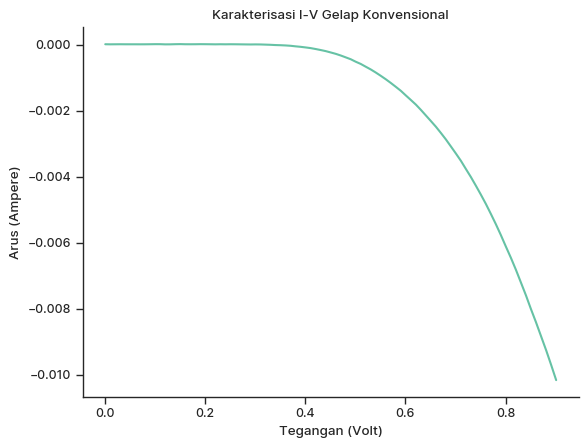

In [1061]:
fig = sns.lineplot(df_gelap_konvensional, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Gelap Konvensional", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

## **Keadaan Terang**

### **IV. Terang DSSC**

In [1062]:
df_terang_dssc = pd.read_csv('/content/dataset/karakterisasi/Terang_DSSC', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_terang_dssc.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.198843,0.002186
2,-0.188734,0.002159
3,-0.178858,0.002137
4,-0.169098,0.002120


In [1063]:
# Menghilangkan nilai 0,0
df_terang_dssc.drop(df_terang_dssc.loc[(df_terang_dssc['Tegangan'] == 0) & (df_terang_dssc['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_terang_dssc.drop(df_terang_dssc.loc[df_terang_dssc['Tegangan'] < 0].index, inplace=True)

In [1064]:
df_terang_dssc.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450875,0.001025
std,0.264103,0.001345
min,0.001048,-0.002571
25%,0.225937,0.000419
50%,0.451093,0.001794
75%,0.675900,0.001954
max,0.901006,0.002029


In [1065]:
print(f"Duplicated: {df_terang_dssc.duplicated().sum()}\n\nNull columns:\n{df_terang_dssc.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


In [1066]:
df_terang_dssc["Densitas Arus"] = df_terang_dssc["Arus"].apply(lambda x: x/0.000009)

In [1067]:
# Daya Maksimum
df_terang_dssc['Area'] = df_terang_dssc['Tegangan'] * df_terang_dssc['Densitas Arus']

df_terang_dssc[df_terang_dssc["Area"] == max(df_terang_dssc["Area"])]

,Tegangan,Arus,Densitas Arus,Area
71,0.500925,0.001682,186.933595,93.63962


In [1068]:
# V_OC
df_terang_dssc["Abs Arus"] = df_terang_dssc["Densitas Arus"].apply(np.absolute)

df_terang_dssc[df_terang_dssc["Abs Arus"] == min(df_terang_dssc["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
92,0.710858,0.000008,0.835099,0.593637,0.835099


In [1069]:
# I_SC
df_terang_dssc["Abs Tegangan"] = df_terang_dssc["Tegangan"].apply(np.absolute)

df_terang_dssc[df_terang_dssc["Abs Tegangan"] == min(df_terang_dssc["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.001048,0.002029,225.413819,0.236129,225.413819,0.001048


[Text(0.5, 1.0, 'Karakterisasi I-V Terang DSSC'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

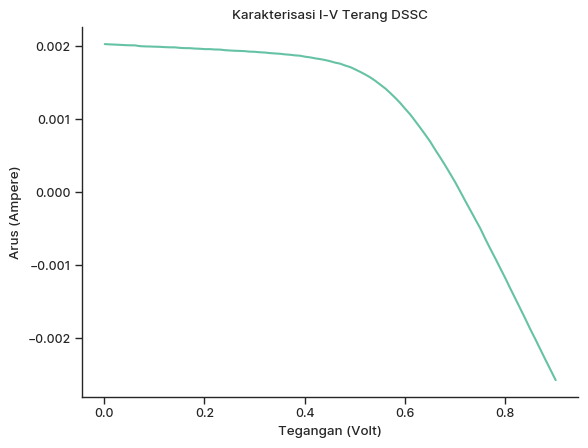

In [1070]:
fig = sns.lineplot(df_terang_dssc, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Terang DSSC", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

### **V. Terang DSSC dengan AgSC8 14.89 wt**

In [1071]:
df_terang_dssc_agsc = pd.read_csv('/content/dataset/karakterisasi/Terang_DSSC_AgSC', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_terang_dssc_agsc.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.199143,0.003234
2,-0.188984,0.003218
3,-0.178774,0.003216
4,-0.168798,0.003209


In [1072]:
# Menghilangkan nilai 0,0
df_terang_dssc_agsc.drop(df_terang_dssc_agsc.loc[(df_terang_dssc_agsc['Tegangan'] == 0) & (df_terang_dssc_agsc['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_terang_dssc_agsc.drop(df_terang_dssc_agsc.loc[df_terang_dssc_agsc['Tegangan'] < 0].index, inplace=True)

In [1073]:
df_terang_dssc_agsc.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450820,0.001625
std,0.264044,0.001814
min,0.001164,-0.002981
25%,0.225796,0.000593
50%,0.451177,0.002627
75%,0.675716,0.002950
max,0.900956,0.003115


In [1074]:
print(f"Duplicated: {df_terang_dssc_agsc.duplicated().sum()}\n\nNull columns:\n{df_terang_dssc_agsc.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


In [1075]:
df_terang_dssc_agsc["Densitas Arus"] = df_terang_dssc_agsc["Arus"].apply(lambda x: x/0.000009)

In [1076]:
# Daya Maksimum
df_terang_dssc_agsc['Area'] = df_terang_dssc_agsc['Tegangan'] * df_terang_dssc_agsc['Densitas Arus']

df_terang_dssc_agsc[df_terang_dssc_agsc["Area"] == max(df_terang_dssc_agsc["Area"])]

,Tegangan,Arus,Densitas Arus,Area
70,0.490665,0.002471,274.600924,134.737109


In [1077]:
# V_OC
df_terang_dssc_agsc["Abs Arus"] = df_terang_dssc_agsc["Densitas Arus"].apply(np.absolute)

df_terang_dssc_agsc[df_terang_dssc_agsc["Abs Arus"] == min(df_terang_dssc_agsc["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
93,0.720801,-0.000062,-6.891321,-4.96727,6.891321


In [1078]:
# I_SC
df_terang_dssc_agsc["Abs Tegangan"] = df_terang_dssc_agsc["Tegangan"].apply(np.absolute)

df_terang_dssc_agsc[df_terang_dssc_agsc["Abs Tegangan"] == min(df_terang_dssc_agsc["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.001164,0.003115,346.131995,0.402938,346.131995,0.001164


[Text(0.5, 1.0, 'Karakterisasi I-V Terang DSSC + AgSC8 14.89 wt'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

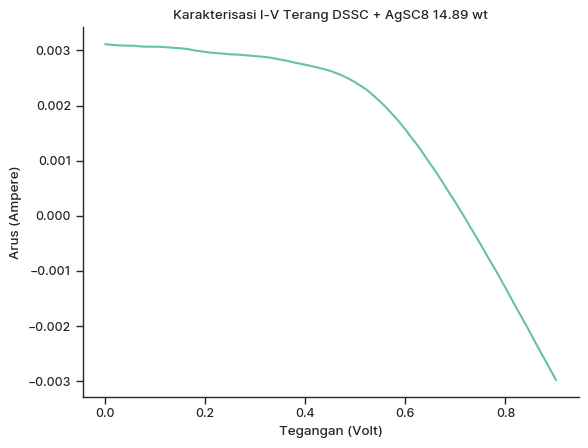

In [1079]:
fig = sns.lineplot(df_terang_dssc_agsc, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Terang DSSC + AgSC8 14.89 wt", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

### **VI. Terang Konvensional**

In [1080]:
df_terang_konvensional = pd.read_csv('/content/dataset/karakterisasi/Terang_Konvensional', delimiter="\t", header=None, names=['Tegangan', 'Arus'])

df_terang_konvensional.head()

,Tegangan,Arus
0,0.000000,0.000000
1,-0.198677,0.002006
2,-0.188867,0.002011
3,-0.178808,0.001992
4,-0.168898,0.001990


In [1081]:
# Menghilangkan nilai 0,0
df_terang_konvensional.drop(df_terang_konvensional.loc[(df_terang_konvensional['Tegangan'] == 0) & (df_terang_konvensional['Arus'] == 0)].index, inplace=True)

# Menghilangkan nilai negatif pada tegangan
df_terang_konvensional.drop(df_terang_konvensional.loc[df_terang_konvensional['Tegangan'] < 0].index, inplace=True)

In [1082]:
df_terang_konvensional.describe()

,Tegangan,Arus
count,91.000000,91.000000
mean,0.450883,-0.000893
std,0.264057,0.003494
min,0.000998,-0.010584
25%,0.226012,-0.002586
50%,0.450794,0.000800
75%,0.675691,0.001789
max,0.901139,0.001942


In [1083]:
print(f"Duplicated: {df_terang_konvensional.duplicated().sum()}\n\nNull columns:\n{df_terang_konvensional.isna().sum()}")

Duplicated: 0

Null columns:
Tegangan    0
Arus        0
dtype: int64


In [1084]:
df_terang_konvensional["Densitas Arus"] = df_terang_konvensional["Arus"].apply(lambda x: x/0.000009)

In [1085]:
# Daya Maksimum
df_terang_konvensional['Area'] = df_terang_konvensional['Tegangan'] * df_terang_konvensional['Densitas Arus']

df_terang_konvensional[df_terang_konvensional["Area"] == max(df_terang_konvensional["Area"])]

,Tegangan,Arus,Densitas Arus,Area
56,0.350981,0.001477,164.134014,57.607996


In [1086]:
# V_OC
df_terang_konvensional["Abs Arus"] = df_terang_konvensional["Densitas Arus"].apply(np.absolute)

df_terang_konvensional[df_terang_konvensional["Abs Arus"] == min(df_terang_konvensional["Abs Arus"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus
73,0.521093,0.000044,4.935606,2.571912,4.935606


In [1087]:
# I_SC
df_terang_konvensional["Abs Tegangan"] = df_terang_konvensional["Tegangan"].apply(np.absolute)

df_terang_konvensional[df_terang_konvensional["Abs Tegangan"] == min(df_terang_konvensional["Abs Tegangan"])]

,Tegangan,Arus,Densitas Arus,Area,Abs Arus,Abs Tegangan
21,0.000998,0.001942,215.770033,0.215246,215.770033,0.000998


[Text(0.5, 1.0, 'Karakterisasi I-V Terang Konvensional'),
 Text(0.5, 0, 'Tegangan (Volt)'),
 Text(0, 0.5, 'Arus (Ampere)')]

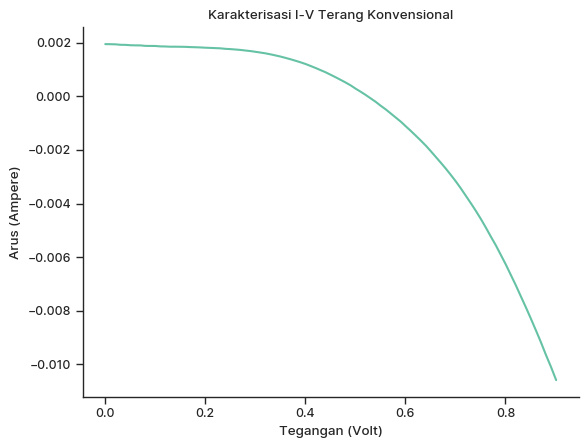

In [1088]:
fig = sns.lineplot(df_terang_konvensional, x="Tegangan", y="Arus", lw=1.5)

fig.set(title="Karakterisasi I-V Terang Konvensional", xlabel="Tegangan (Volt)", ylabel="Arus (Ampere)")

# **Absorbansi**

## **Ruthenium Dye**

### **Dataframe**

In [1089]:
df_dye_3lapis = pd.read_csv('/content/dataset/absorbansi/dye_3_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_dye_3lapis["Absorbansi"] = df_dye_3lapis["Absorbansi"].apply(lambda x: x/max(df_dye_3lapis["Absorbansi"]))

df_dye_3lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,-0.352851
3,178.43,0.000000
4,178.82,0.297381
...,...,...
2043,875.50,0.027735
2044,875.78,0.036210
2045,876.07,0.047766
2046,876.35,0.041602


In [1090]:
df_dye_5lapis = pd.read_csv('/content/dataset/absorbansi/dye_5_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_dye_5lapis["Absorbansi"] = df_dye_5lapis["Absorbansi"].apply(lambda x: x/max(df_dye_5lapis["Absorbansi"]))

df_dye_5lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,-0.202300
3,178.43,0.257781
4,178.82,0.000000
...,...,...
2043,875.50,0.040595
2044,875.78,0.043978
2045,876.07,0.054127
2046,876.35,0.048714


In [1091]:
df_dye_7lapis = pd.read_csv('/content/dataset/absorbansi/dye_7_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_dye_7lapis["Absorbansi"] = df_dye_7lapis["Absorbansi"].apply(lambda x: x/max(df_dye_7lapis["Absorbansi"]))

df_dye_7lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,-0.860259
3,178.43,0.222904
4,178.82,-0.167689
...,...,...
2043,875.50,0.040218
2044,875.78,0.041581
2045,876.07,0.057941
2046,876.35,0.048398


### **Dye 3 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

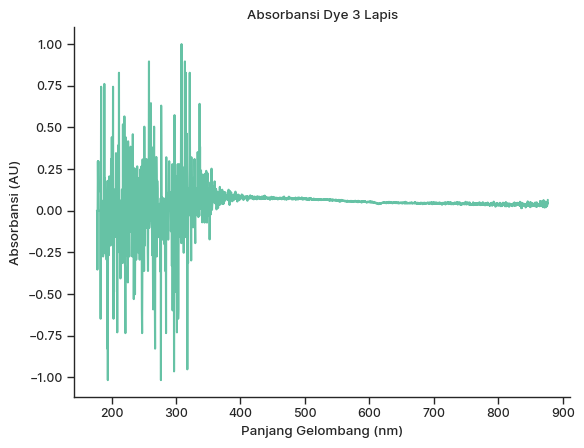

In [1092]:
fig = sns.lineplot(data=df_dye_3lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 3 Lapis (Mutlak - Semua Range)**

In [1093]:
df_dye_3lapis_mutlak = df_dye_3lapis.copy()

df_dye_3lapis_mutlak["Absorbansi"] = df_dye_3lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

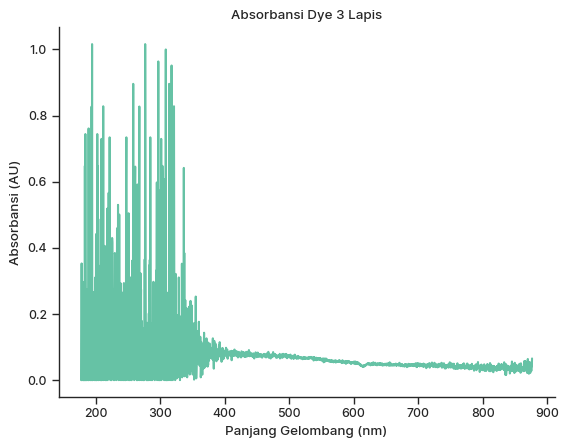

In [1094]:
fig = sns.lineplot(data=df_dye_3lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 3 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

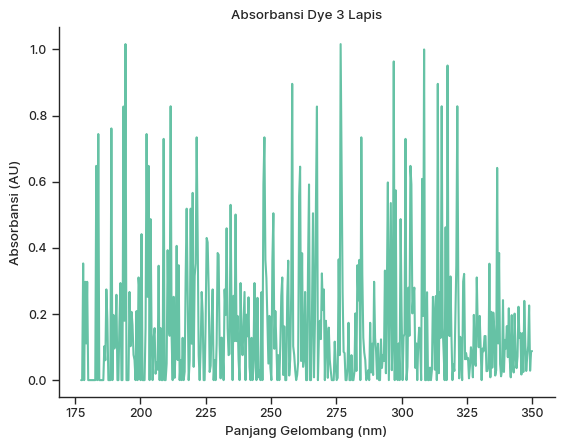

In [1095]:
fig = sns.lineplot(data=df_dye_3lapis_mutlak.loc[df_dye_3lapis_mutlak['Panjang Gelombang'] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 3 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

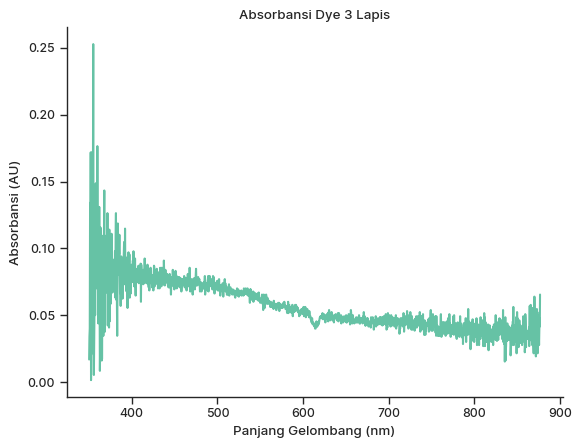

In [1096]:
fig = sns.lineplot(data=df_dye_3lapis_mutlak.loc[df_dye_3lapis_mutlak['Panjang Gelombang'] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 3 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

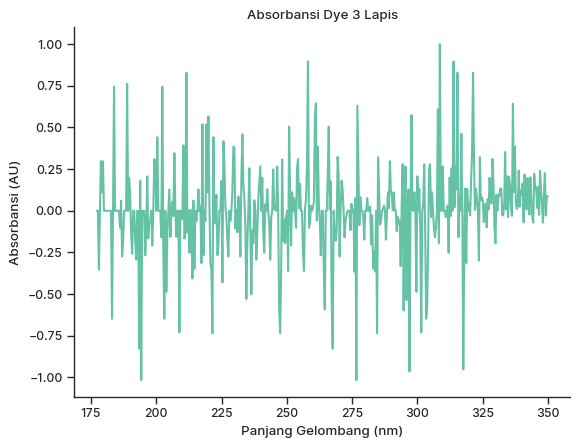

In [1097]:
fig = sns.lineplot(data=df_dye_3lapis.loc[df_dye_3lapis['Panjang Gelombang'] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 3 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

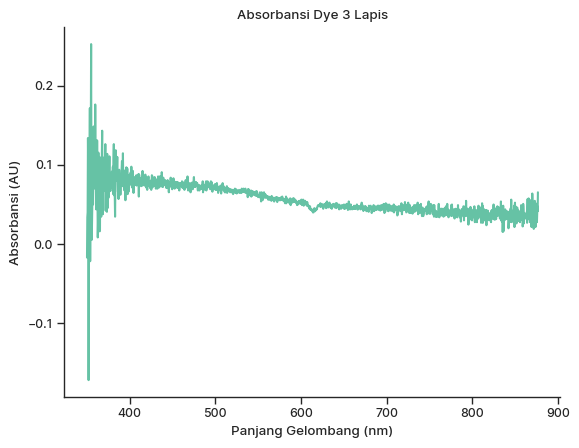

In [1098]:
fig = sns.lineplot(data=df_dye_3lapis.loc[df_dye_3lapis['Panjang Gelombang'] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

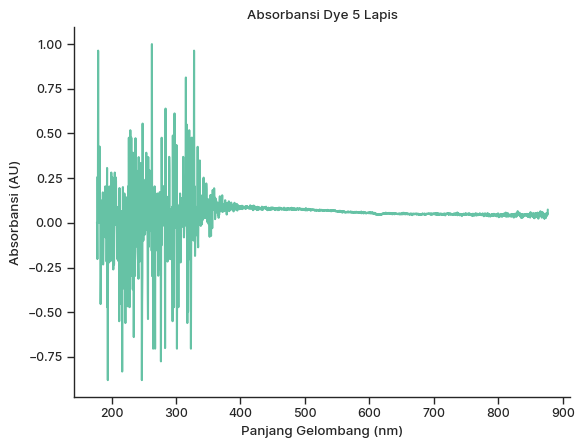

In [1099]:
fig = sns.lineplot(data=df_dye_5lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Mutlak - Semua Range)**

In [1100]:
df_dye_5lapis_mutlak = df_dye_5lapis.copy()

df_dye_5lapis_mutlak["Absorbansi"] = df_dye_5lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

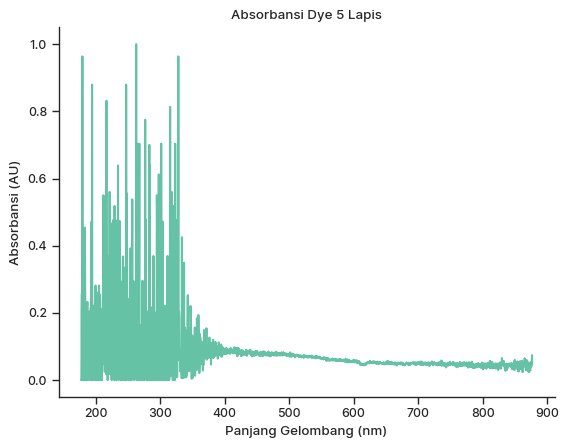

In [1101]:
fig = sns.lineplot(data=df_dye_5lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

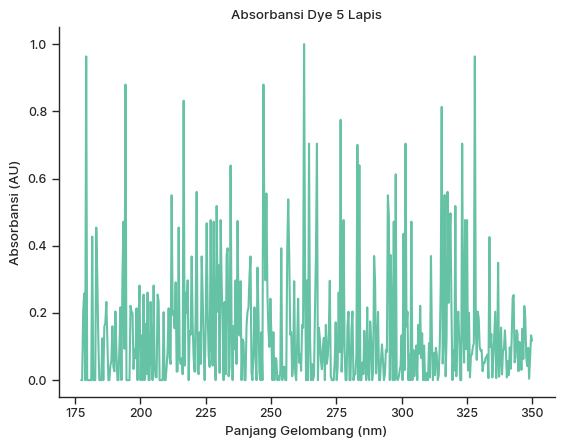

In [1102]:
fig = sns.lineplot(data=df_dye_5lapis_mutlak.loc[df_dye_5lapis_mutlak['Panjang Gelombang'] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

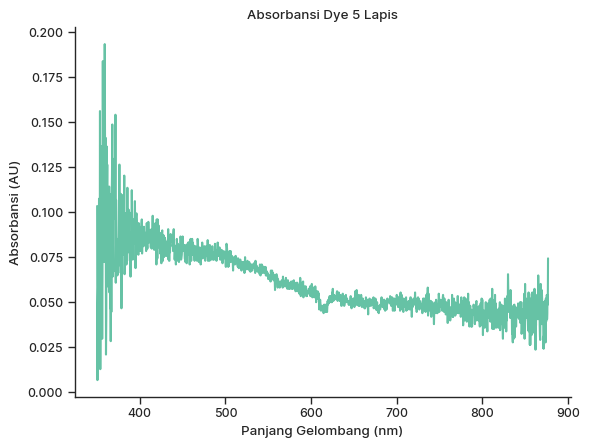

In [1103]:
fig = sns.lineplot(data=df_dye_5lapis_mutlak.loc[df_dye_5lapis_mutlak["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

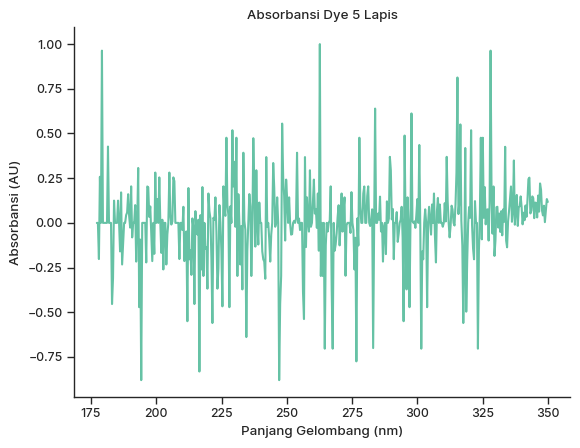

In [1104]:
fig = sns.lineplot(data=df_dye_5lapis.loc[df_dye_5lapis["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 5 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

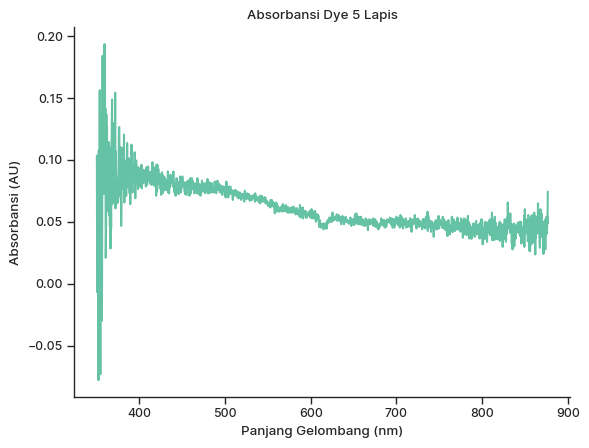

In [1105]:
fig = sns.lineplot(data=df_dye_5lapis.loc[df_dye_5lapis["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

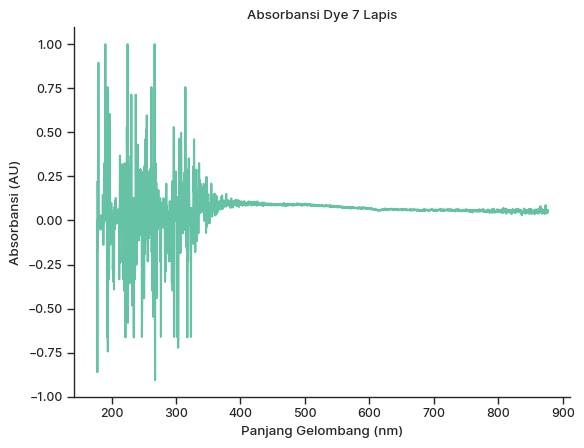

In [1106]:
fig = sns.lineplot(data=df_dye_7lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Mutlak - Semua Range)**

In [1107]:
df_dye_7lapis_mutlak = df_dye_7lapis.copy()

df_dye_7lapis_mutlak["Absorbansi"] = df_dye_7lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

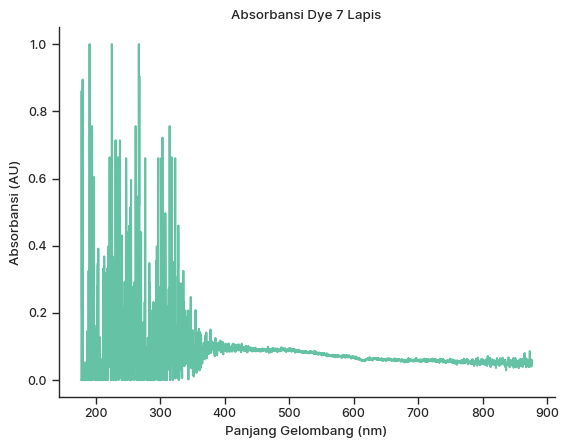

In [1108]:
fig = sns.lineplot(data=df_dye_7lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

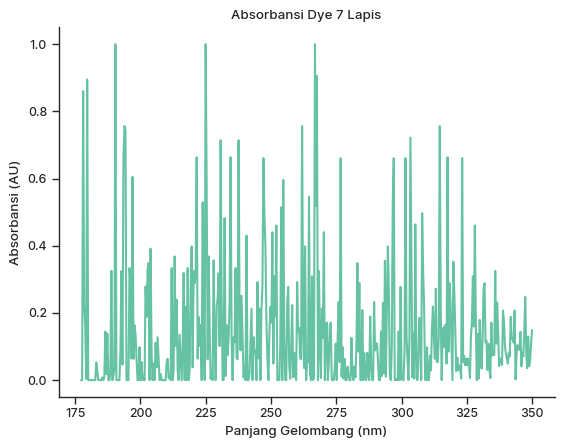

In [1109]:
fig = sns.lineplot(data=df_dye_7lapis_mutlak.loc[df_dye_7lapis_mutlak["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

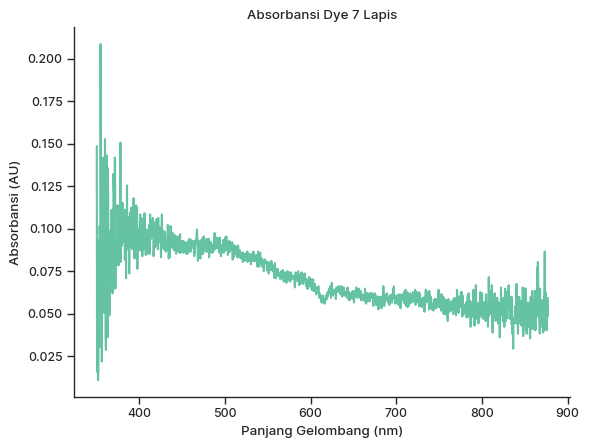

In [1110]:
fig = sns.lineplot(data=df_dye_7lapis_mutlak.loc[df_dye_7lapis_mutlak["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

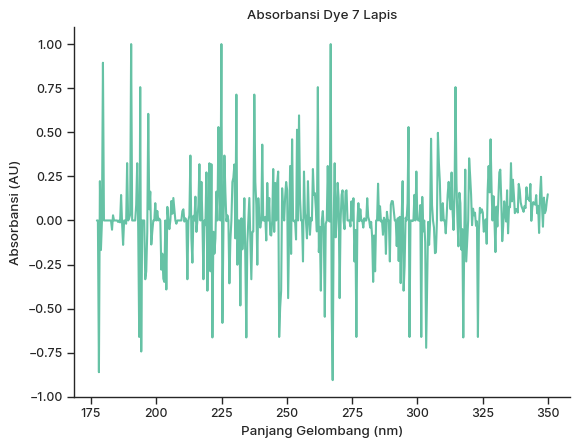

In [1111]:
fig = sns.lineplot(data=df_dye_7lapis.loc[df_dye_7lapis['Panjang Gelombang'] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **Dye 7 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi Dye 7 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

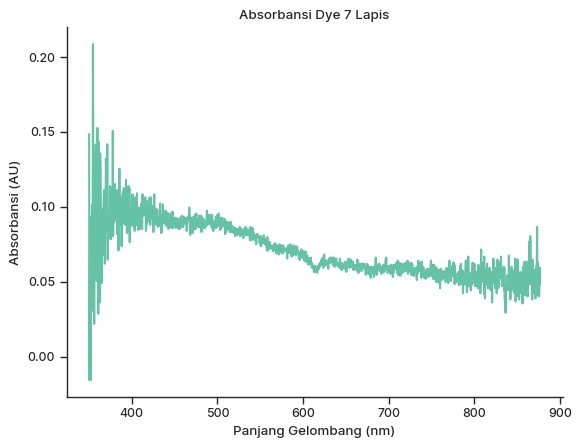

In [1112]:
fig = sns.lineplot(data=df_dye_7lapis.loc[df_dye_7lapis['Panjang Gelombang'] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi Dye 7 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

## **P3HT**

### **Dataframe**

In [1113]:
df_p3ht_1lapis = pd.read_csv('/content/dataset/absorbansi/p3ht_1_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_p3ht_1lapis["Absorbansi"] = df_p3ht_1lapis["Absorbansi"].apply(lambda x: x/max(df_p3ht_1lapis["Absorbansi"]))

df_p3ht_1lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,0.185468
3,178.43,0.400255
4,178.82,0.000000
...,...,...
2043,875.50,0.032505
2044,875.78,0.035054
2045,876.07,0.045252
2046,876.35,0.045252


In [1114]:
df_p3ht_3lapis = pd.read_csv('/content/dataset/absorbansi/p3ht_3_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_p3ht_3lapis["Absorbansi"] = df_p3ht_3lapis["Absorbansi"].apply(lambda x: x/max(df_p3ht_3lapis["Absorbansi"]))

df_p3ht_3lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,0.000000
3,178.43,0.000000
4,178.82,0.115055
...,...,...
2043,875.50,0.031824
2044,875.78,0.033660
2045,876.07,0.015300
2046,876.35,0.028152


In [1115]:
df_p3ht_5lapis = pd.read_csv('/content/dataset/absorbansi/p3ht_5_lapis.txt', delimiter="\t", header=None, names=["Panjang Gelombang", "Absorbansi"])
df_p3ht_5lapis["Absorbansi"] = df_p3ht_5lapis["Absorbansi"].apply(lambda x: x/max(df_p3ht_5lapis["Absorbansi"]))

df_p3ht_5lapis

,Panjang Gelombang,Absorbansi
0,177.27,0.000000
1,177.66,0.000000
2,178.05,-0.765861
3,178.43,0.277190
4,178.82,-0.211480
...,...,...
2043,875.50,0.046828
2044,875.78,0.045317
2045,876.07,0.051360
2046,876.35,0.046073


### **P3HT 1 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

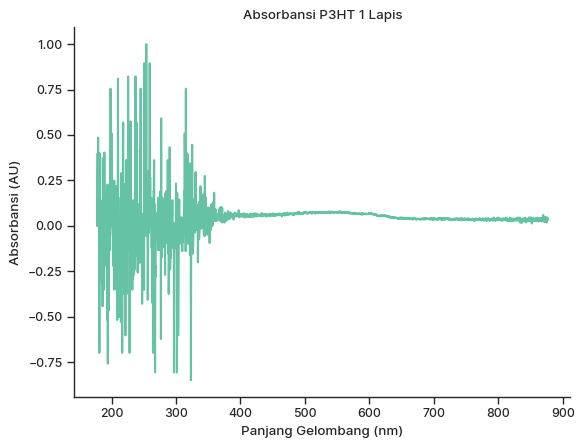

In [1116]:
fig = sns.lineplot(data=df_p3ht_1lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 1 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

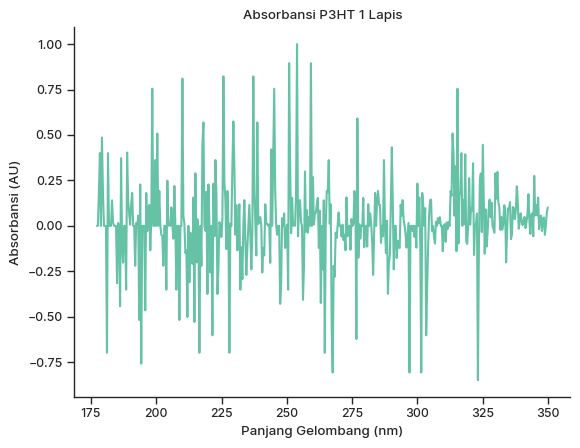

In [1117]:
fig = sns.lineplot(data=df_p3ht_1lapis.loc[df_p3ht_1lapis["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 1 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

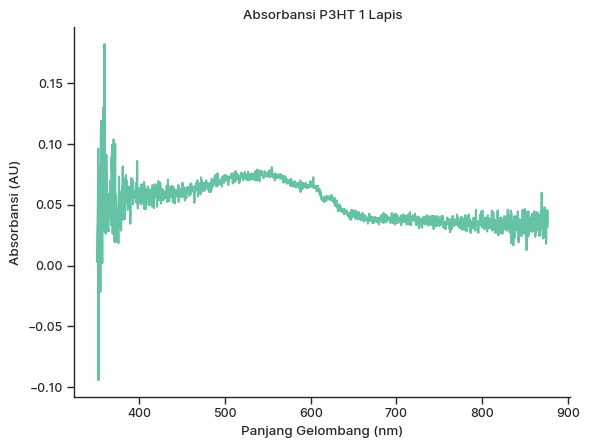

In [1118]:
fig = sns.lineplot(data=df_p3ht_1lapis.loc[df_p3ht_1lapis["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 1 Lapis (Mutlak - Semua Range)**

In [1119]:
df_p3ht_1lapis_mutlak = df_p3ht_1lapis.copy()

df_p3ht_1lapis_mutlak["Absorbansi"] = df_p3ht_1lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

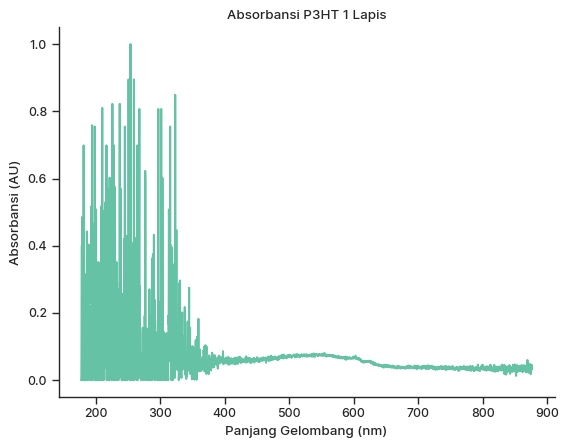

In [1120]:
fig = sns.lineplot(data=df_p3ht_1lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 1 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

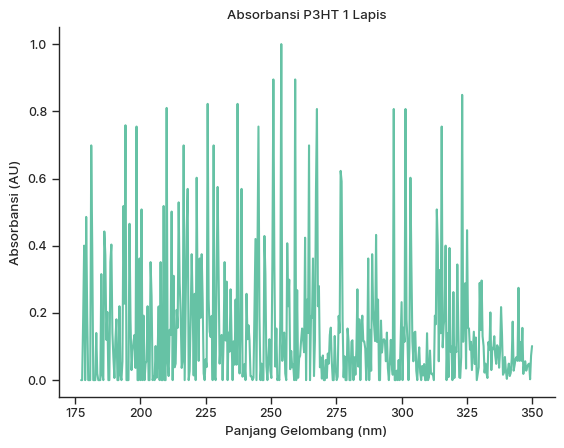

In [1121]:
fig = sns.lineplot(data=df_p3ht_1lapis_mutlak.loc[df_p3ht_1lapis_mutlak["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 1 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 1 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

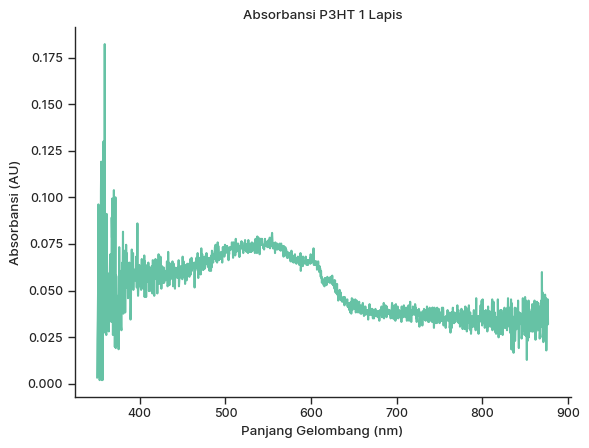

In [1122]:
fig = sns.lineplot(data=df_p3ht_1lapis_mutlak.loc[df_p3ht_1lapis_mutlak["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 1 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

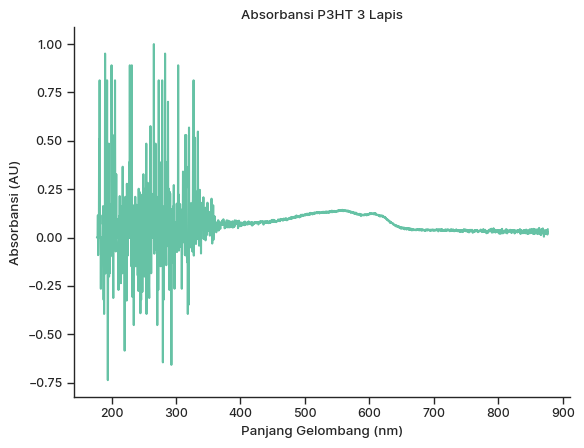

In [1123]:
fig = sns.lineplot(data=df_p3ht_3lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

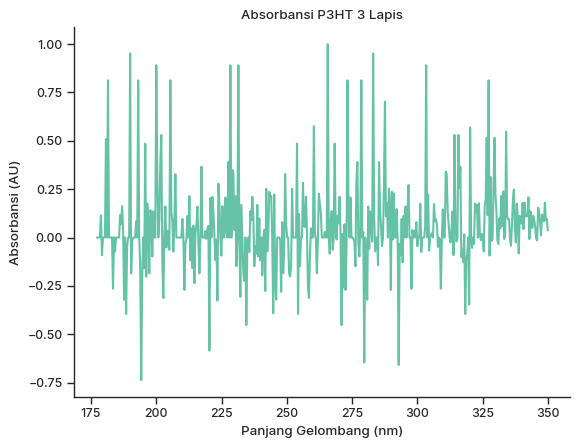

In [1124]:
fig = sns.lineplot(data=df_p3ht_3lapis.loc[df_p3ht_3lapis["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

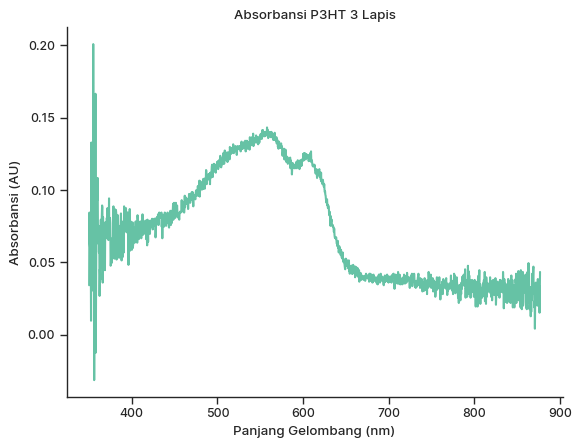

In [1125]:
fig = sns.lineplot(data=df_p3ht_3lapis.loc[df_p3ht_3lapis["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Mutlak - Semua Range)**

In [1126]:
df_p3ht_3lapis_mutlak = df_p3ht_3lapis.copy()

df_p3ht_3lapis_mutlak["Absorbansi"] = df_p3ht_3lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

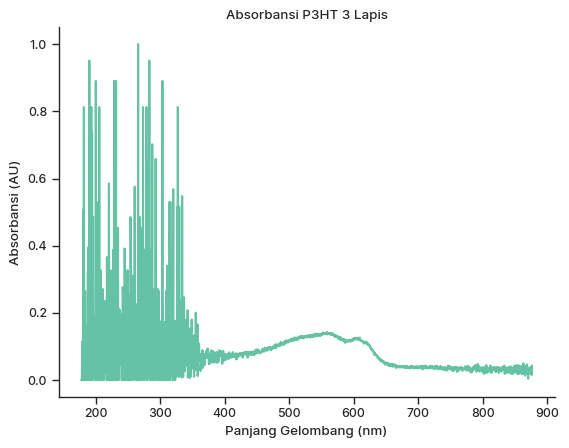

In [1127]:
fig = sns.lineplot(data=df_p3ht_3lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

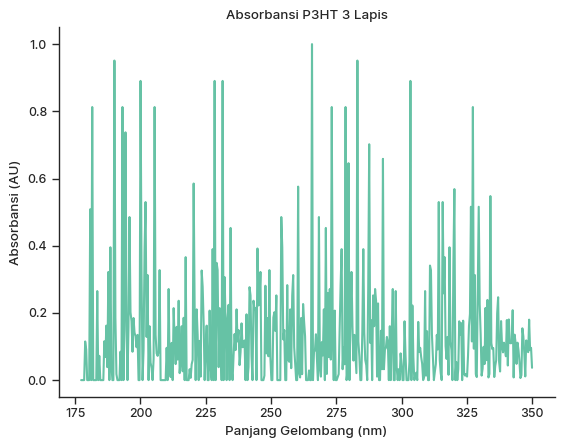

In [1128]:
fig = sns.lineplot(data=df_p3ht_3lapis_mutlak.loc[df_p3ht_3lapis_mutlak["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 3 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 3 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

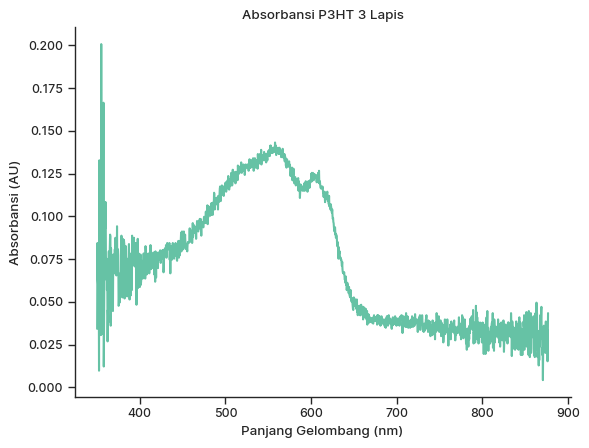

In [1129]:
fig = sns.lineplot(data=df_p3ht_3lapis_mutlak.loc[df_p3ht_3lapis_mutlak["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 3 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Mentahan)**

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

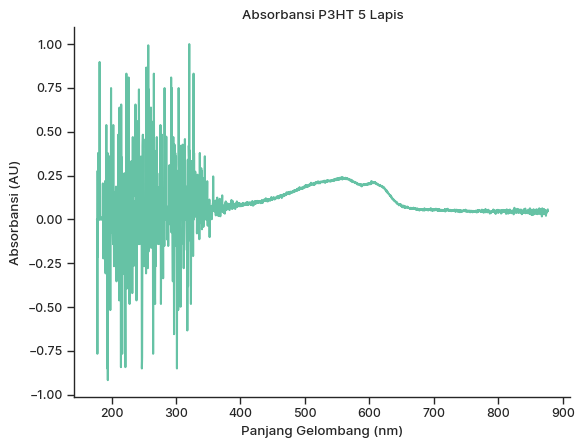

In [1130]:
fig = sns.lineplot(data=df_p3ht_5lapis, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Biasa - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

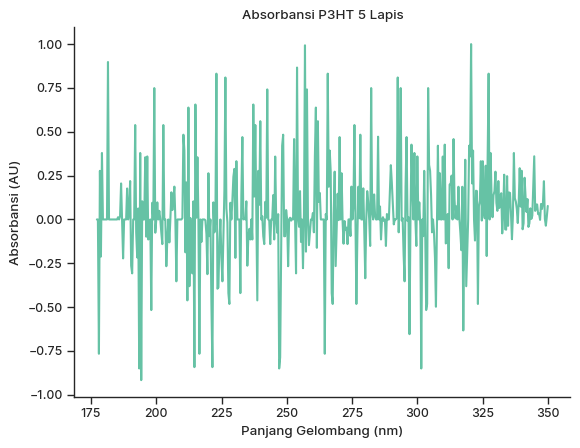

In [1131]:
fig = sns.lineplot(data=df_p3ht_5lapis.loc[df_p3ht_5lapis["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Biasa - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

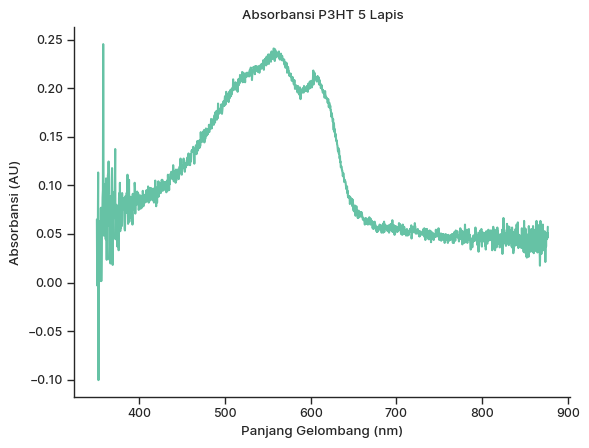

In [1132]:
fig = sns.lineplot(data=df_p3ht_5lapis.loc[df_p3ht_5lapis["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Mutlak - Semua Range)**

In [1133]:
df_p3ht_5lapis_mutlak = df_p3ht_5lapis.copy()

df_p3ht_5lapis_mutlak["Absorbansi"] = df_p3ht_5lapis["Absorbansi"].apply(np.absolute)

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

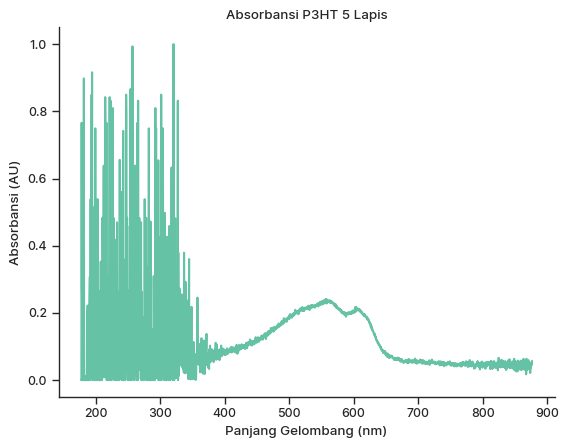

In [1134]:
fig = sns.lineplot(data=df_p3ht_5lapis_mutlak, x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Mutlak - (0-350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

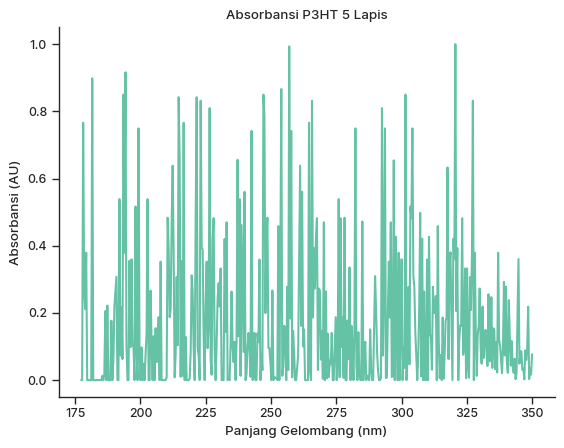

In [1135]:
fig = sns.lineplot(data=df_p3ht_5lapis_mutlak.loc[df_p3ht_5lapis_mutlak["Panjang Gelombang"] <= 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")

### **P3HT 5 Lapis (Mutlak - (>350))**

[Text(0.5, 1.0, 'Absorbansi P3HT 5 Lapis'),
 Text(0.5, 0, 'Panjang Gelombang (nm)'),
 Text(0, 0.5, 'Absorbansi (AU)')]

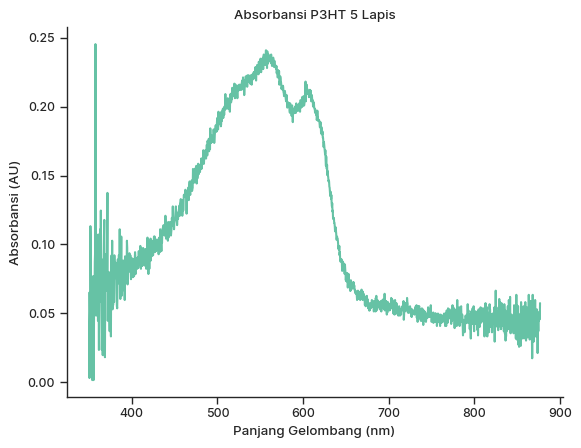

In [1136]:
fig = sns.lineplot(data=df_p3ht_5lapis_mutlak.loc[df_p3ht_5lapis_mutlak["Panjang Gelombang"] > 350], x="Panjang Gelombang", y="Absorbansi")

fig.set(title="Absorbansi P3HT 5 Lapis", xlabel="Panjang Gelombang (nm)", ylabel="Absorbansi (AU)")